# Импорты

In [80]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')


# Лабораторная №1. Часть 1

### Нормальное несмещенное распределение

In [81]:
df_iris = pd.read_csv('data/Iris.csv')


Датасет состоит из 150 наблюдений и включает 4 количественных признака и 1 категориальный признак:

Признаки:
* Sepal Length (длина чашелистика): Длина чашелистика в сантиметрах.
* Sepal Width (ширина чашелистика): Ширина чашелистика в сантиметрах.
* Petal Length (длина лепестка): Длина лепестка в сантиметрах.
* Petal Width (ширина лепестка): Ширина лепестка в сантиметрах.
* Species (вид): Категориальный признак, обозначающий вид ириса

In [82]:
# Ознакомимся с форматом данных
df_iris.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
map_names = {
    "SepalLengthCm": "длина чашелистика",
    "SepalWidthCm": "ширина чашелистика",
    "PetalLengthCm": "длина лепестка",
    "PetalWidthCm": "ширина лепестка",
}


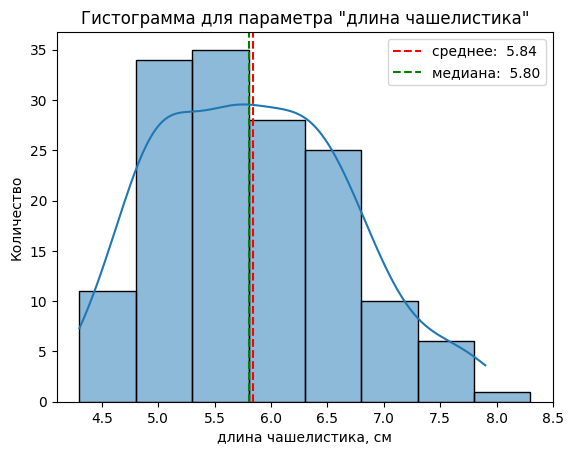

p-value: 0.010181161454691156
Нулевая гипотеза отклонена


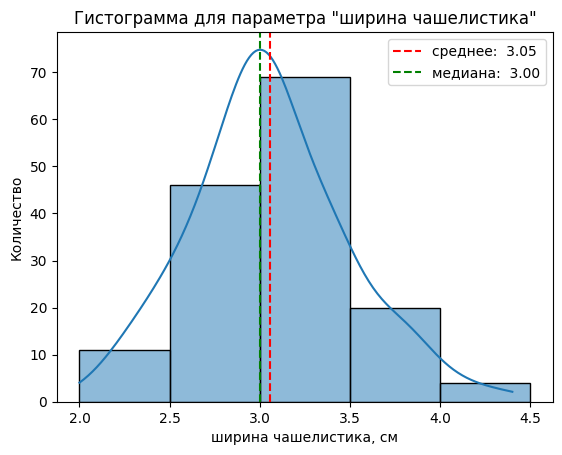

p-value: 0.07517918532015967
Нулевая гипотеза принята


In [84]:
for column in ['SepalLengthCm', 'SepalWidthCm']:
    plt.title(f'Гистограмма для параметра "{map_names[column]}"')
    
    ax = sns.histplot(df_iris, x=column, binwidth=0.5, kde=True)
    
    current_mean = df_iris[column].mean()
    current_median = df_iris[column].median()
    
    ax.axvline(current_mean, color='r', linestyle='--', label=f'среднее: {current_mean:5.2f}')
    ax.axvline(current_median, color='g', linestyle='--', label=f'медиана: {current_median:5.2f}')
    
    plt.xlabel(f"{map_names[column]}, см")
    plt.ylabel("Количество")
    plt.legend()
    plt.show()
    shapiro_result = shapiro(df_iris[column])
    current_pvalue = shapiro_result.pvalue
    print(f"p-value: {shapiro_result.pvalue}")
    if current_pvalue > 0.05:
        print('Нулевая гипотеза принята')
    else:
        print('Нулевая гипотеза отклонена')


В данном датасете две колонки с распределением похожим на нормальное, в которых медиана и среднее приблизительно совпадают. Но для лишь для ширины чашелистика тест Шапиро показывает p-value больше 0.05, что позволяет нам считать, что ширина чашелистика распределена нормально, а длина чашелистика - нет.

При этом, разница среднего и медиана, относительно размаха распределения, у ширины чашелистника - больше.

### Равномерное распределение

Text(0, 0.5, 'Количество')

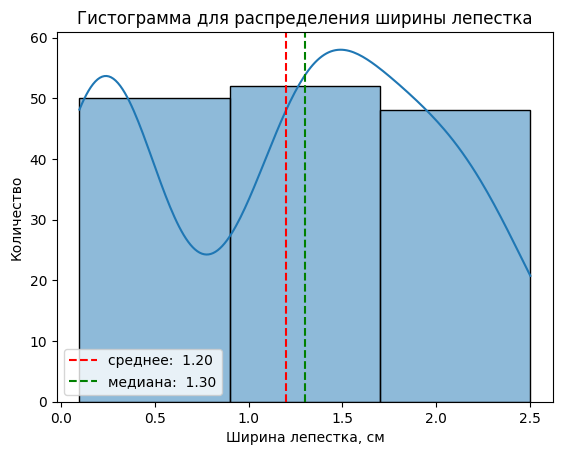

In [85]:
ax = sns.histplot(df_iris, x='PetalWidthCm', bins=3, kde=True)
plt.title('Гистограмма для распределения ширины лепестка')
plt.xlabel('Ширина лепестка, см')

current_median = df_iris['PetalWidthCm'].median()
current_mean = df_iris['PetalWidthCm'].mean()

ax.axvline(current_mean, color='r', linestyle='--', label=f'среднее: {current_mean:5.2f}')
ax.axvline(current_median, color='g', linestyle='--', label=f'медиана: {current_median:5.2f}')

plt.legend()
plt.ylabel('Количество')


Не смотря на некоторую пропасадку в частоте в районе 0.5-1 см, это распределение похоже на раномерное

### Смещенное распределение

In [98]:
df_workers = pd.read_csv('data/workers.csv')
df_workers.head(5)


,days,age,sex
0,5,39,F
1,4,54,M
2,4,26,M
3,5,42,M
4,4,29,M


Датасет содержит 237 наблюдейний со следующими характеристиками:
* Количество дней на больничном за год
* Возраст человека
* Пол человека

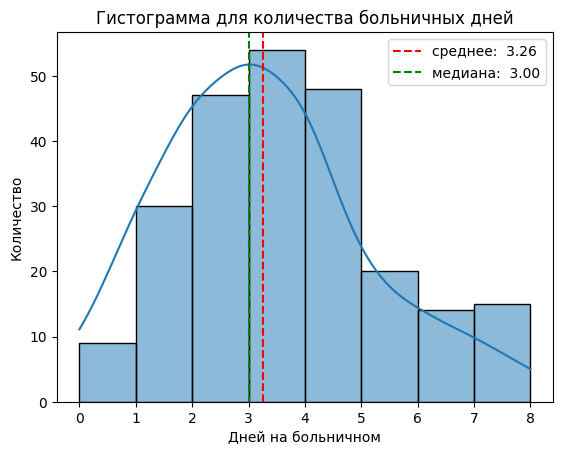

In [99]:
column_name = 'days'

ax = sns.histplot(df_workers, x=column_name, binwidth=1, kde=True)
plt.title('Гистограмма для количества больничных дней')
plt.xlabel('Дней на больничном')
plt.ylabel('Количество')

current_median = df_workers[column_name].median()
current_mean = df_workers[column_name].mean()

ax.axvline(current_mean, color='r', linestyle='--', label=f'среднее: {current_mean:5.2f}')
ax.axvline(current_median, color='g', linestyle='--', label=f'медиана: {current_median:5.2f}')

plt.legend()


смещение будет равно

In [100]:
print(f"Смещение между средним и медианой: {np.round(np.abs(current_median - current_mean), 2)}")


Смещение между средним и медианой: 0.26


### Визуализации для приведенных датасетов

#### Для iris приведем следующие графики:

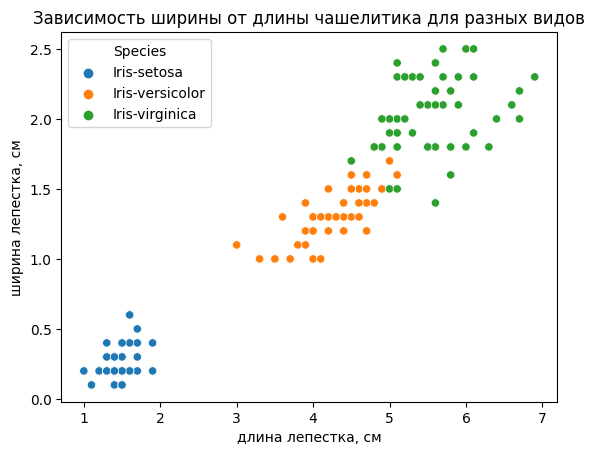

In [101]:
x_column_name = 'PetalLengthCm'
y_column_name = 'PetalWidthCm'

plt.title('Зависимость ширины от длины чашелитика для разных видов')

sns.scatterplot(df_iris, x=x_column_name, y=y_column_name, hue='Species')
plt.xlabel(f"{map_names[x_column_name]}, см")
plt.ylabel(f"{map_names[y_column_name]}, см");


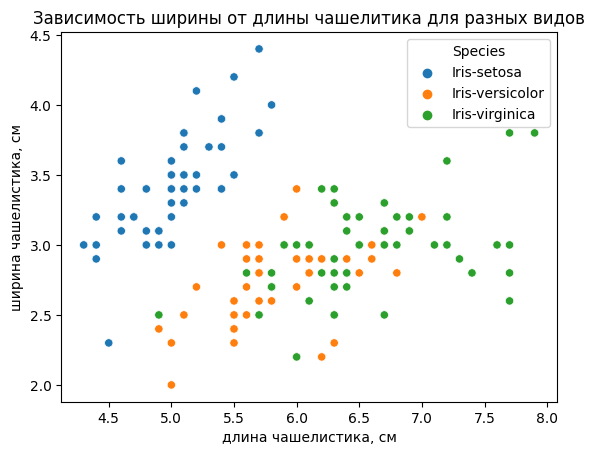

In [102]:
x_column_name = 'SepalLengthCm'
y_column_name = 'SepalWidthCm'

plt.title('Зависимость ширины от длины чашелитика для разных видов')

sns.scatterplot(df_iris, x=x_column_name, y=y_column_name, hue='Species')
plt.xlabel(f"{map_names[x_column_name]}, см")
plt.ylabel(f"{map_names[y_column_name]}, см");


Из интересного, можно отметить следующее:

Лучше всего разница заметна в характеристиках лепестка, там наиболее явно выделяются кластеры разных видов, при этом Iris-Setosa достаточно сильно отичается от двух других видов

# Лабораторная №1. Часть 2

### Выбросы в количестве больничных дней

Text(0.5, 0, 'Дни')

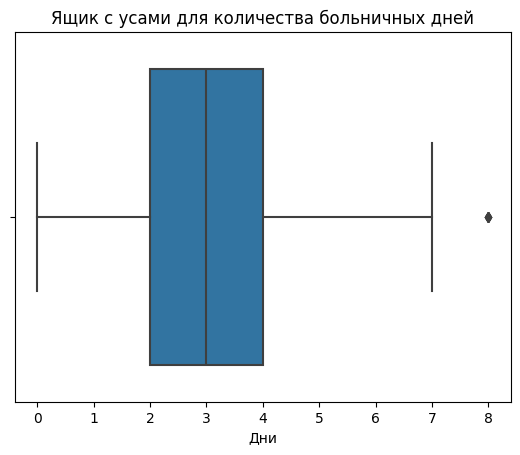

In [104]:
sns.boxplot(df_workers, x='days')
plt.title('Ящик с усами для количества больничных дней')
plt.xlabel('Дни')


Выбросами в данном случая являются больничные на 8 дней, что действительно странно, так как больничные при простуде обычно выдают на срок до недели.<br>
Выбросы в таком случае могут быть связаны с тяжестью болезни/ошибкой при заполнении данных/выходными выпавшими на больничный и.т.д<br>
Единственное, что мы можем посмотреть, кто чаще так более мужчины или женщины

In [108]:
df_workers[df_workers['days'] > 7]


,days,age,sex
123,8,33,M
129,8,42,F
132,8,36,M
159,8,44,M
183,8,35,M


Выбросы чаще случаются у мужчин